In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

In [2]:
# Import data
df = pd.read_csv(
    "data.csv", 
    names = ["serial", "date", "age", "distance", "stores", "latitude", "longitude", "price"]
)

In [3]:
# Check for missing values
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [4]:
# Splitting into train-test
X_train, X_test, Y_train, Y_test = train_test_split(
    df.loc[:, df.columns != "price"],
    df[["price"]]
)

In [5]:
# Dropping unnecessary columns
X_train = X_train.drop(columns = ["serial"])
X_test = X_test.drop(columns = ["serial"])

In [6]:
# Standardizing data
mask = X_train.columns.isin(["date"])
cols = X_train.columns[~mask]

scaler = StandardScaler()
scaler = scaler.fit(X_train[cols].values)

X_train[cols] = scaler.transform(X_train[cols].values)
X_test[cols] = scaler.transform(X_test[cols].values)

In [7]:
# Model building
n_inputs = X_train.shape[1]
n_outputs = 1

model = Sequential([
    Dense(10, input_shape = (n_inputs, ), activation = "relu"),
    Dense(20, activation = "relu"),
    Dense(5, activation = "relu"),
    Dense(n_outputs),
])

In [8]:
# Compile model
model.compile(
    loss = "mse",
    metrics = [RootMeanSquaredError()],
    optimizer = Adam()
)

In [9]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [10]:
es = EarlyStopping(monitor = "val_loss", patience = 5)

In [11]:
pred_untrained = model.predict(X_test.values)

In [12]:
history = model.fit(
    X_train.values,
    Y_train.values,
    validation_data = [X_test.values, Y_test.values],
    epochs = 500,
    callbacks = [es]
)

Train on 3750 samples, validate on 1250 samples
Epoch 1/500
3750/3750 [==============================] - 1s 191us/sample - loss: 170025185.5531 - root_mean_squared_error: 13039.3721 - val_loss: 140264331.0848 - val_root_mean_squared_error: 11843.3252
Epoch 2/500
3750/3750 [==============================] - 0s 46us/sample - loss: 90342413.7003 - root_mean_squared_error: 9504.8643 - val_loss: 36165273.5232 - val_root_mean_squared_error: 6013.7563
Epoch 3/500
3750/3750 [==============================] - 0s 51us/sample - loss: 10572912.1165 - root_mean_squared_error: 3251.6016 - val_loss: 1129091.0732 - val_root_mean_squared_error: 1062.5870
Epoch 4/500
3750/3750 [==============================] - 0s 50us/sample - loss: 1060673.3699 - root_mean_squared_error: 1029.8899 - val_loss: 989612.5714 - val_root_mean_squared_error: 994.7927
Epoch 5/500
3750/3750 [==============================] - 0s 48us/sample - loss: 1044335.8098 - root_mean_squared_error: 1021.9274 - val_loss: 986365.8794 - val_

Epoch 43/500
3750/3750 [==============================] - 0s 45us/sample - loss: 931509.2062 - root_mean_squared_error: 965.1473 - val_loss: 877535.8276 - val_root_mean_squared_error: 936.7689
Epoch 44/500
3750/3750 [==============================] - 0s 44us/sample - loss: 929339.8466 - root_mean_squared_error: 964.0228 - val_loss: 871119.0234 - val_root_mean_squared_error: 933.3376
Epoch 45/500
3750/3750 [==============================] - 0s 45us/sample - loss: 923895.8074 - root_mean_squared_error: 961.1950 - val_loss: 867935.4498 - val_root_mean_squared_error: 931.6304
Epoch 46/500
3750/3750 [==============================] - 0s 45us/sample - loss: 919199.8277 - root_mean_squared_error: 958.7491 - val_loss: 886618.9008 - val_root_mean_squared_error: 941.6044
Epoch 47/500
3750/3750 [==============================] - 0s 33us/sample - loss: 921012.4057 - root_mean_squared_error: 959.6939 - val_loss: 911601.8900 - val_root_mean_squared_error: 954.7785
Epoch 48/500
3750/3750 [===========

3750/3750 [==============================] - 0s 34us/sample - loss: 652699.3677 - root_mean_squared_error: 807.8981 - val_loss: 604970.6679 - val_root_mean_squared_error: 777.7987
Epoch 86/500
3750/3750 [==============================] - 0s 35us/sample - loss: 635218.4850 - root_mean_squared_error: 797.0059 - val_loss: 596758.3602 - val_root_mean_squared_error: 772.5013
Epoch 87/500
3750/3750 [==============================] - 0s 32us/sample - loss: 622978.7786 - root_mean_squared_error: 789.2900 - val_loss: 568777.4523 - val_root_mean_squared_error: 754.1733
Epoch 88/500
3750/3750 [==============================] - 0s 33us/sample - loss: 596069.3947 - root_mean_squared_error: 772.0553 - val_loss: 573012.3637 - val_root_mean_squared_error: 756.9758
Epoch 89/500
3750/3750 [==============================] - 0s 33us/sample - loss: 577451.8812 - root_mean_squared_error: 759.9025 - val_loss: 530705.9907 - val_root_mean_squared_error: 728.4957
Epoch 90/500
3750/3750 [========================

In [13]:
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

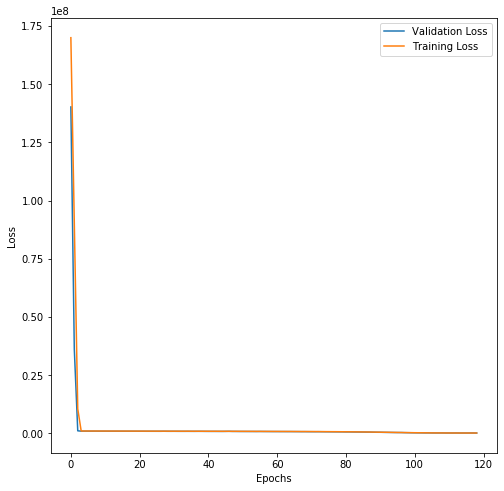

In [14]:
plot_loss(history)

In [15]:
pred_trained = model.predict(X_test.values)
pred_trained

array([[12949.212],
       [14859.9  ],
       [12504.563],
       ...,
       [12994.483],
       [14283.491],
       [15603.083]], dtype=float32)

In [16]:
Y_test

,price
4934,13537
2077,15103
3532,12099
4801,14950
1859,13457
...,...
2438,12192
2460,14389
1756,13780
4166,13561
